# 2000 PlayStore Games Analysis

#### About Dataset

#### Dataset Overview:
Entries and Columns: The dataset consists of 2,000 entries, each representing a game from the App Store, spread across 14 columns.
Completeness: Most columns are fully populated with 2,000 non-null entries. However, the 'price' column has 1942 non-null entries, indicating some games might be free or their pricing data is missing. The 'releaseNotes' column has 1969 non-null entries, suggesting some games might not have release notes available.

#### Column Analysis:
artistName: Names of the game developers or publishers.
averageUserRating: The average user rating on a scale, with all entries populated, suggesting a comprehensive user feedback representation.
averageUserRatingForCurrentVersion: Average ratings specifically for the current version of the games.
contentAdvisoryRating: Age suitability ratings with values like '4+', '12+', '9+', and '17+', indicating a diverse range of content appropriate for various age groups.
description: Game descriptions, providing insights into the game's theme, gameplay, and features.
fileSizeBytes: The size of the game files in bytes, indicative of the game's scale and complexity.
isGameCenterEnabled: A boolean indicating whether the game is integrated with Apple's Game Center, showing a mix of games with and without Game Center integration.
minimumOsVersion: The minimum required version of the operating system, ensuring compatibility information is available for users.
price: Game pricing information, with some missing values; the range includes free (0.0) to premium games.
primaryGenreId: All games have the same genre ID (6014), suggesting they are from the same primary genre.
releaseDate: The release dates for the games, useful for temporal analysis and trend identification.
trackName: The name of the games as listed on the App Store.
userRatingCount: The number of user ratings, providing a quantitative measure of user engagement.
releaseNotes: Notes regarding game updates and new features, with some entries missing.
Data Science Applications:
Trend Analysis: Utilize 'releaseDate' and 'averageUserRating' to identify trends in game popularity and user satisfaction over time.
Content Analysis: Employ NLP techniques on 'description' and 'releaseNotes' to extract themes and features that correlate with higher user ratings.
Pricing Strategy: Analyze 'price' alongside 'averageUserRating' and 'userRatingCount' to assess the impact of pricing on user engagement and satisfaction.
Demographic Targeting: Use 'contentAdvisoryRating' to understand the target demographics for different types of games.
Ethical Consideration:
The dataset is ethically mined, ensuring respect for data privacy and integrity. The effort to maintain ethical standards in data collection is commendable, aligning with best practices in data science.

#### Acknowledgment:
A special note of gratitude is extended to the App Store platform for not only providing a rich dataset but also allowing the use of its iconic imagery to enhance the dataset's visual appeal. This collaboration underscores the synergy between data science and digital ecosystems, facilitating a deeper understanding of user preferences and market dynamics

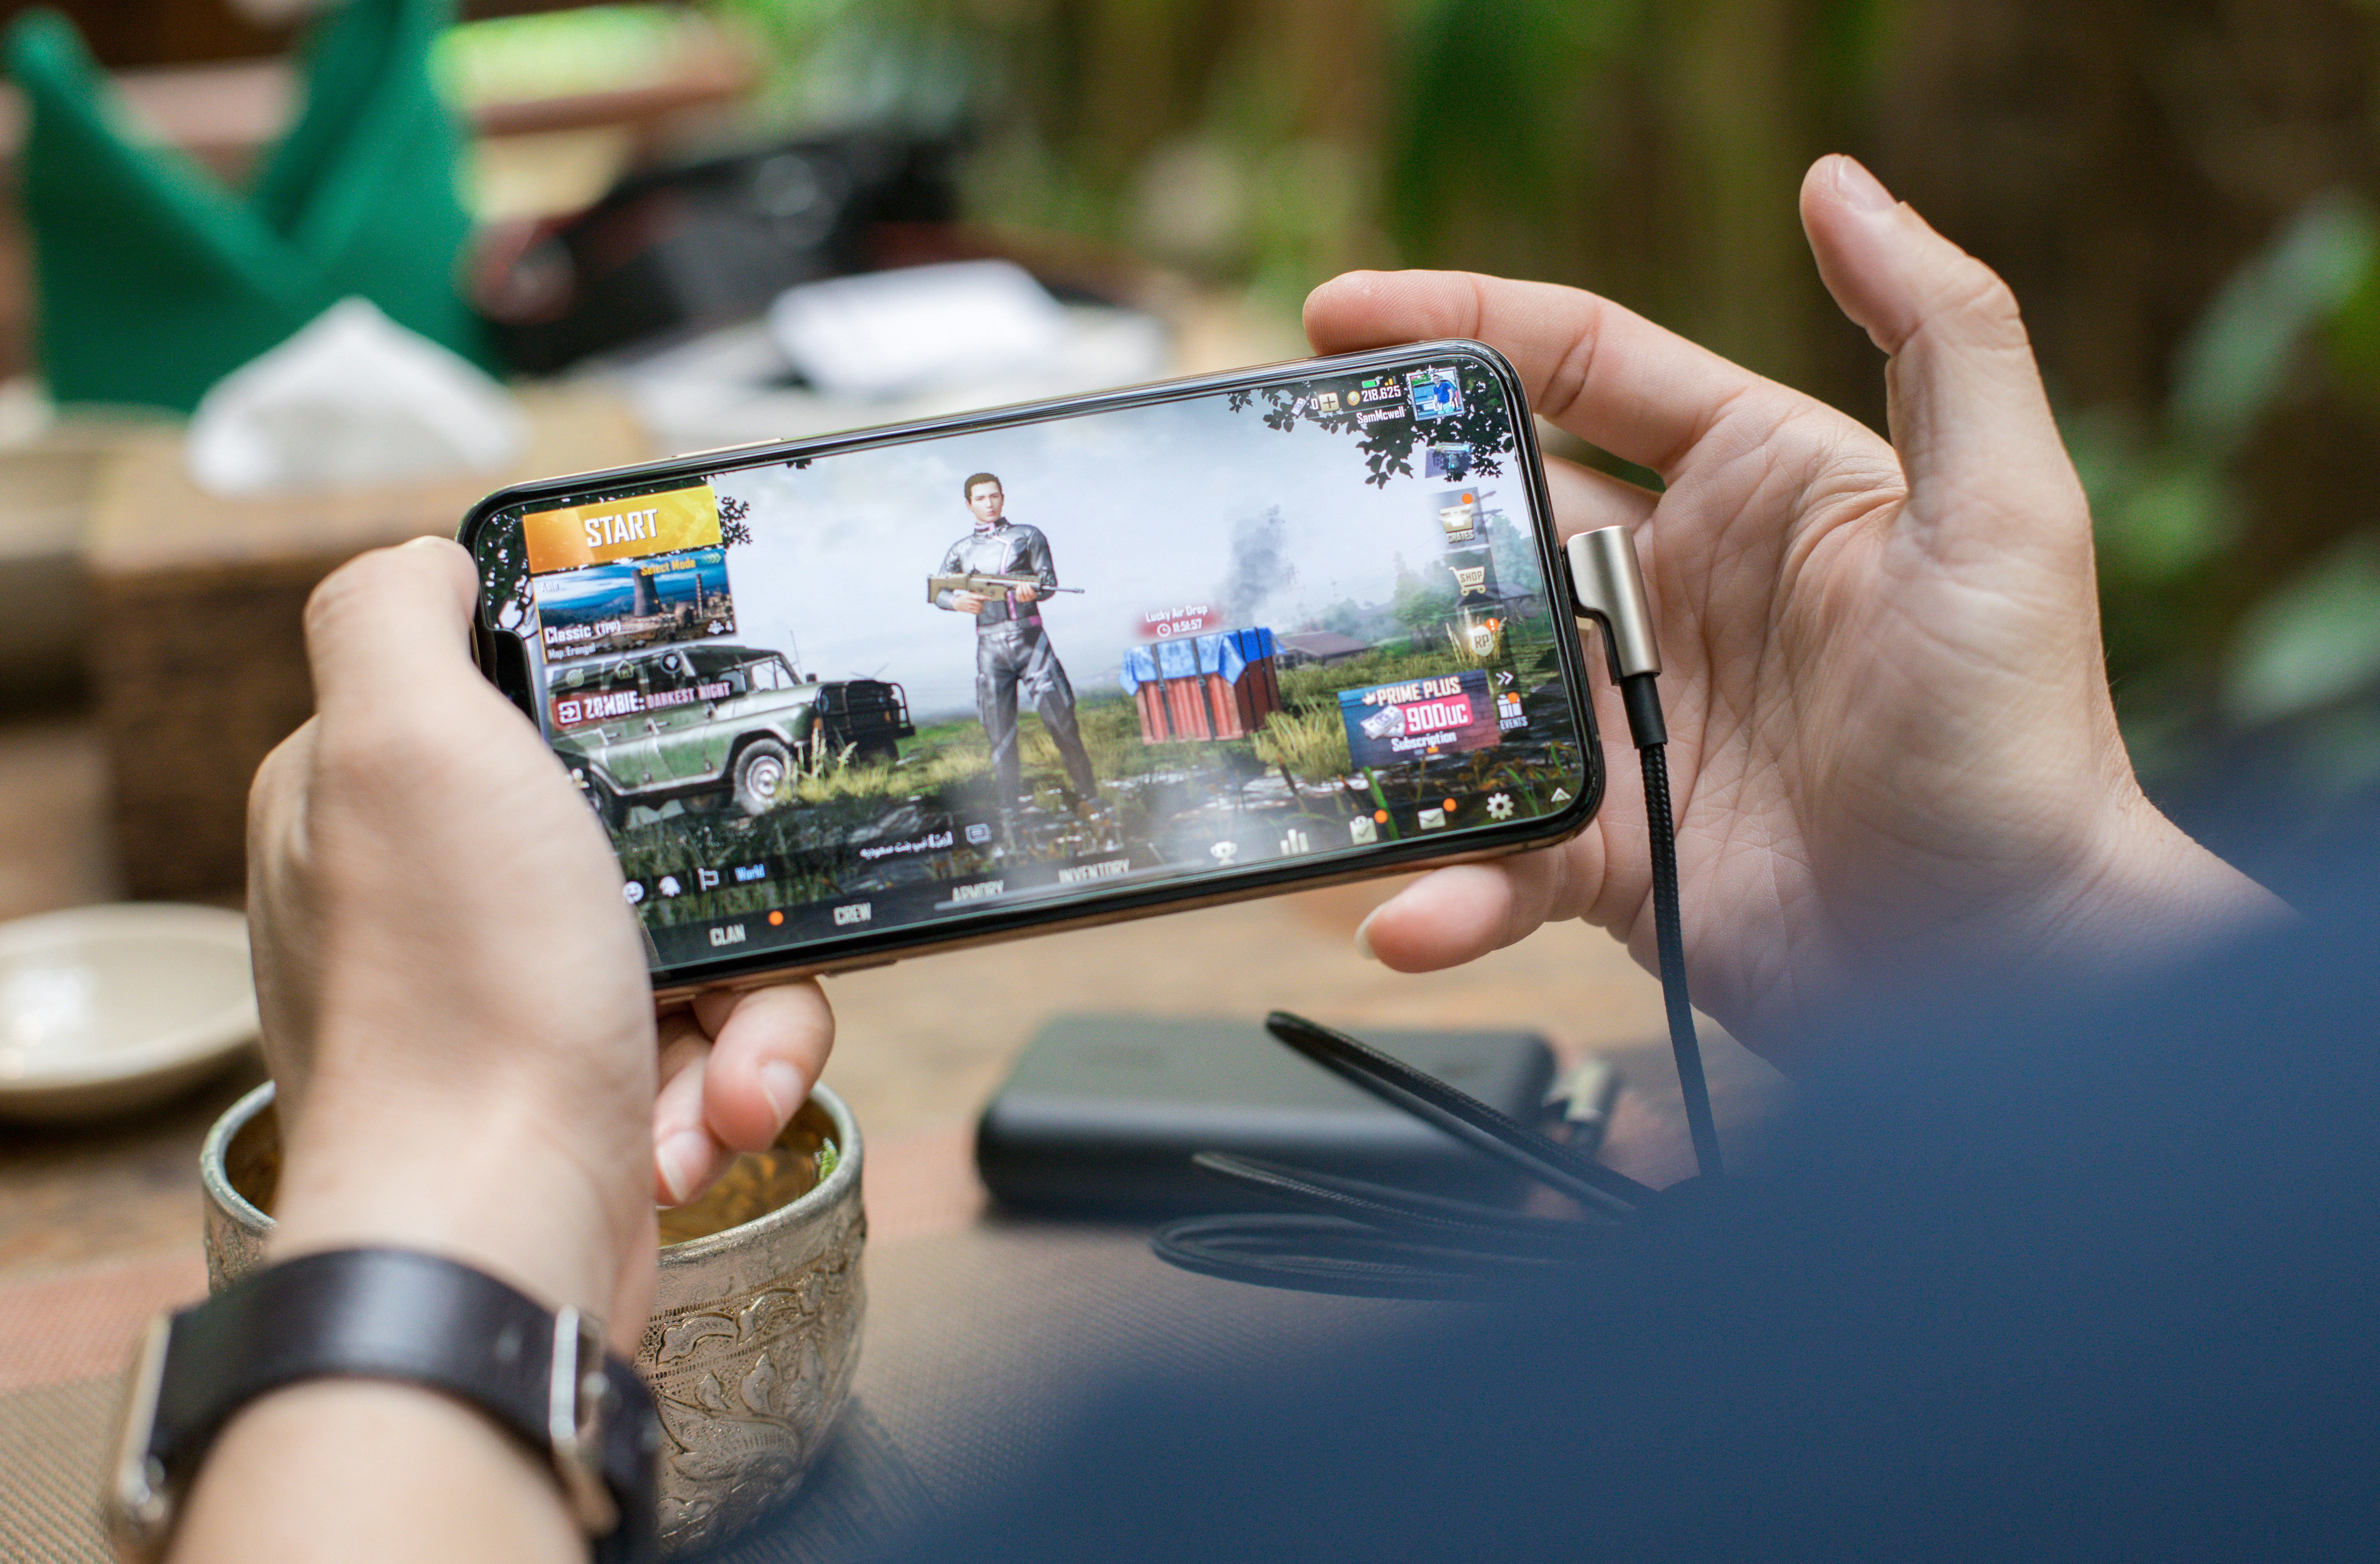

## Importing Dependencies

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.style.use('ggplot')

## Preprocessing

In [68]:
df = pd.read_csv('/content/drive/MyDrive/app analysis/2000_games_appstore.csv')

### Filing Missing Values

In [69]:
df['price'] = df['price'].fillna(0)
df['releaseNotes'] = df['releaseNotes'].fillna('No Improvement Needed')

### Dropping Columns

In [70]:
df = df.drop(['averageUserRatingForCurrentVersion','description'], axis = 1)
#droping averageuserratingforcurrentversion have duplicate values of average user rating.
#description is drop because it is the one line description of game, which is not useful for analysis.

### Changing Format

In [71]:
df['releasedate'] = pd.to_datetime(df['releaseDate']).dt.date
df['releasetime'] = pd.to_datetime(df['releaseDate']).dt.time
df = df.drop('releaseDate', axis = 1)
# Convert 'releasedate' to datetime
df['releasedate'] = pd.to_datetime(df['releasedate'])
df['year'] = df['releasedate'].dt.year

### Converting fileSizeBytes to MegaBytes

In [72]:
def b_mb(fileSizeBytes):
  return 	fileSizeBytes/1024/1024

df['fileSizeBytes'] = df['fileSizeBytes'].apply(b_mb)
df['fileSizeBytes'] = df['fileSizeBytes'].round(2)

### Renaming Columns

In [73]:
df = df.rename(columns={'artistName': 'Studio', 'primaryGenreId': 'genreid','fileSizeBytes':'filesizemb',
                        'trackName':'games','userRatingCount':'users'})

### Clean and Preprocessed Data

In [74]:
df.head(1)

Studio  averageUserRating  \
0  Ynfo SAS di Graziano Gennaro & Co.            4.67589   

  contentAdvisoryRating  filesizemb  isGameCenterEnabled minimumOsVersion  \
0                    4+       35.22                False             12.0   

   price  genreid        games  users             releaseNotes releasedate  \
0    0.0     6014  Sticker GO!    253  Performance improvement  2024-02-08   

  releasetime  year  
0    08:00:00  2024

## Exploration

### Studio producing more games

In [75]:
studiogames = df['Studio'].value_counts(ascending=False).reset_index().head(6)
studiogames.columns = ['Studio', 'count']

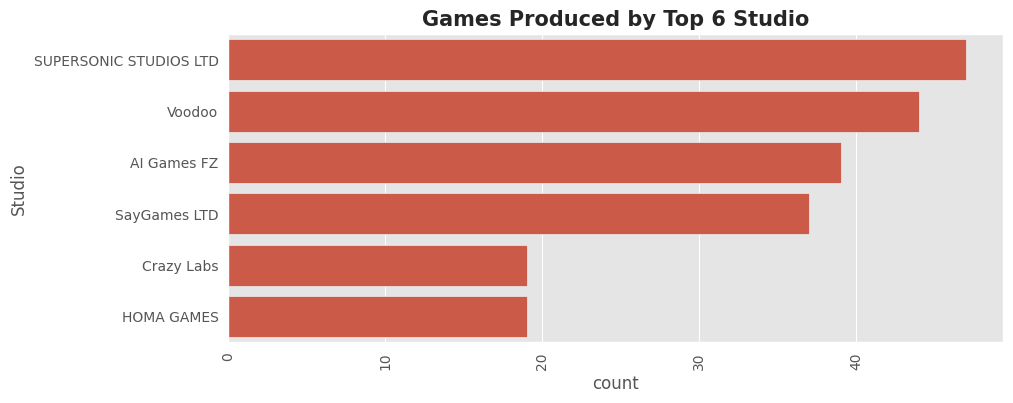

In [76]:
plt.figure(figsize=(10, 4))
sns.barplot(y = studiogames['Studio'], x = studiogames['count'])
plt.xticks(rotation=90, fontsize = 10)
plt.title('Games Produced by Top 6 Studio', fontweight = 'bold', fontsize = 15)
plt.show()

### Top 5 Studio on the basis on average user ratings

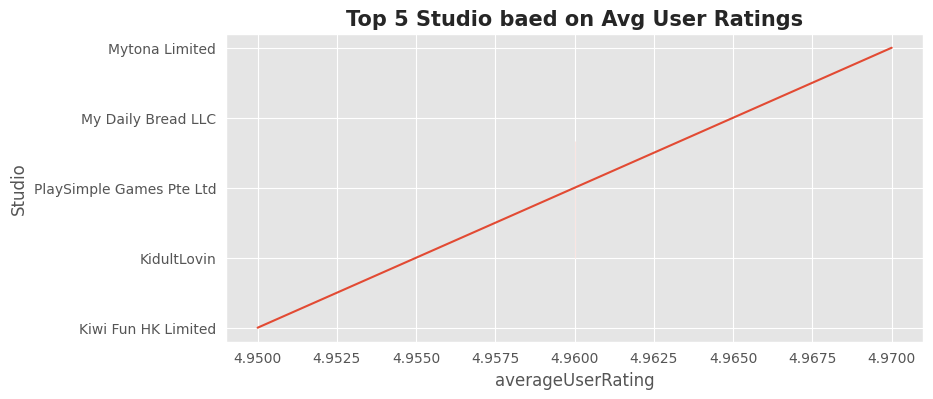

In [77]:
top5 = df.groupby('Studio')['averageUserRating'].max().round(2).sort_values(ascending = False).reset_index().head(5)
plt.figure(figsize=(9,4))
sns.lineplot(y = top5['Studio'], x = top5['averageUserRating'])
plt.title('Top 5 Studio baed on Avg User Ratings', fontweight = 'bold', fontsize = 15)
plt.show()

### Top 10 games on Average user Rating

In [78]:
df_grouped = df.groupby('games')[['averageUserRating','price']].max().reset_index().sort_values(by ='averageUserRating', ascending = False ).head(10)
df_grouped.style.background_gradient(cmap='Reds')

### Top 10 games on price

In [79]:
top10 = df.groupby('games')[['averageUserRating','price']].max().reset_index().sort_values(by ='price', ascending = False ).head(10)
top10.style.background_gradient(cmap='Greens')

### Content Advisory Rating on the Basis of Average user Rating

In [80]:
df.groupby('contentAdvisoryRating')['averageUserRating'].max().reset_index().style.background_gradient('summer')

### Game Release on Each Months of Year

In [81]:
pip install calmap

In [82]:
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
sorted_df = df[df['year'].isin(years)]

Text(0.5, 0.92, 'Games released')

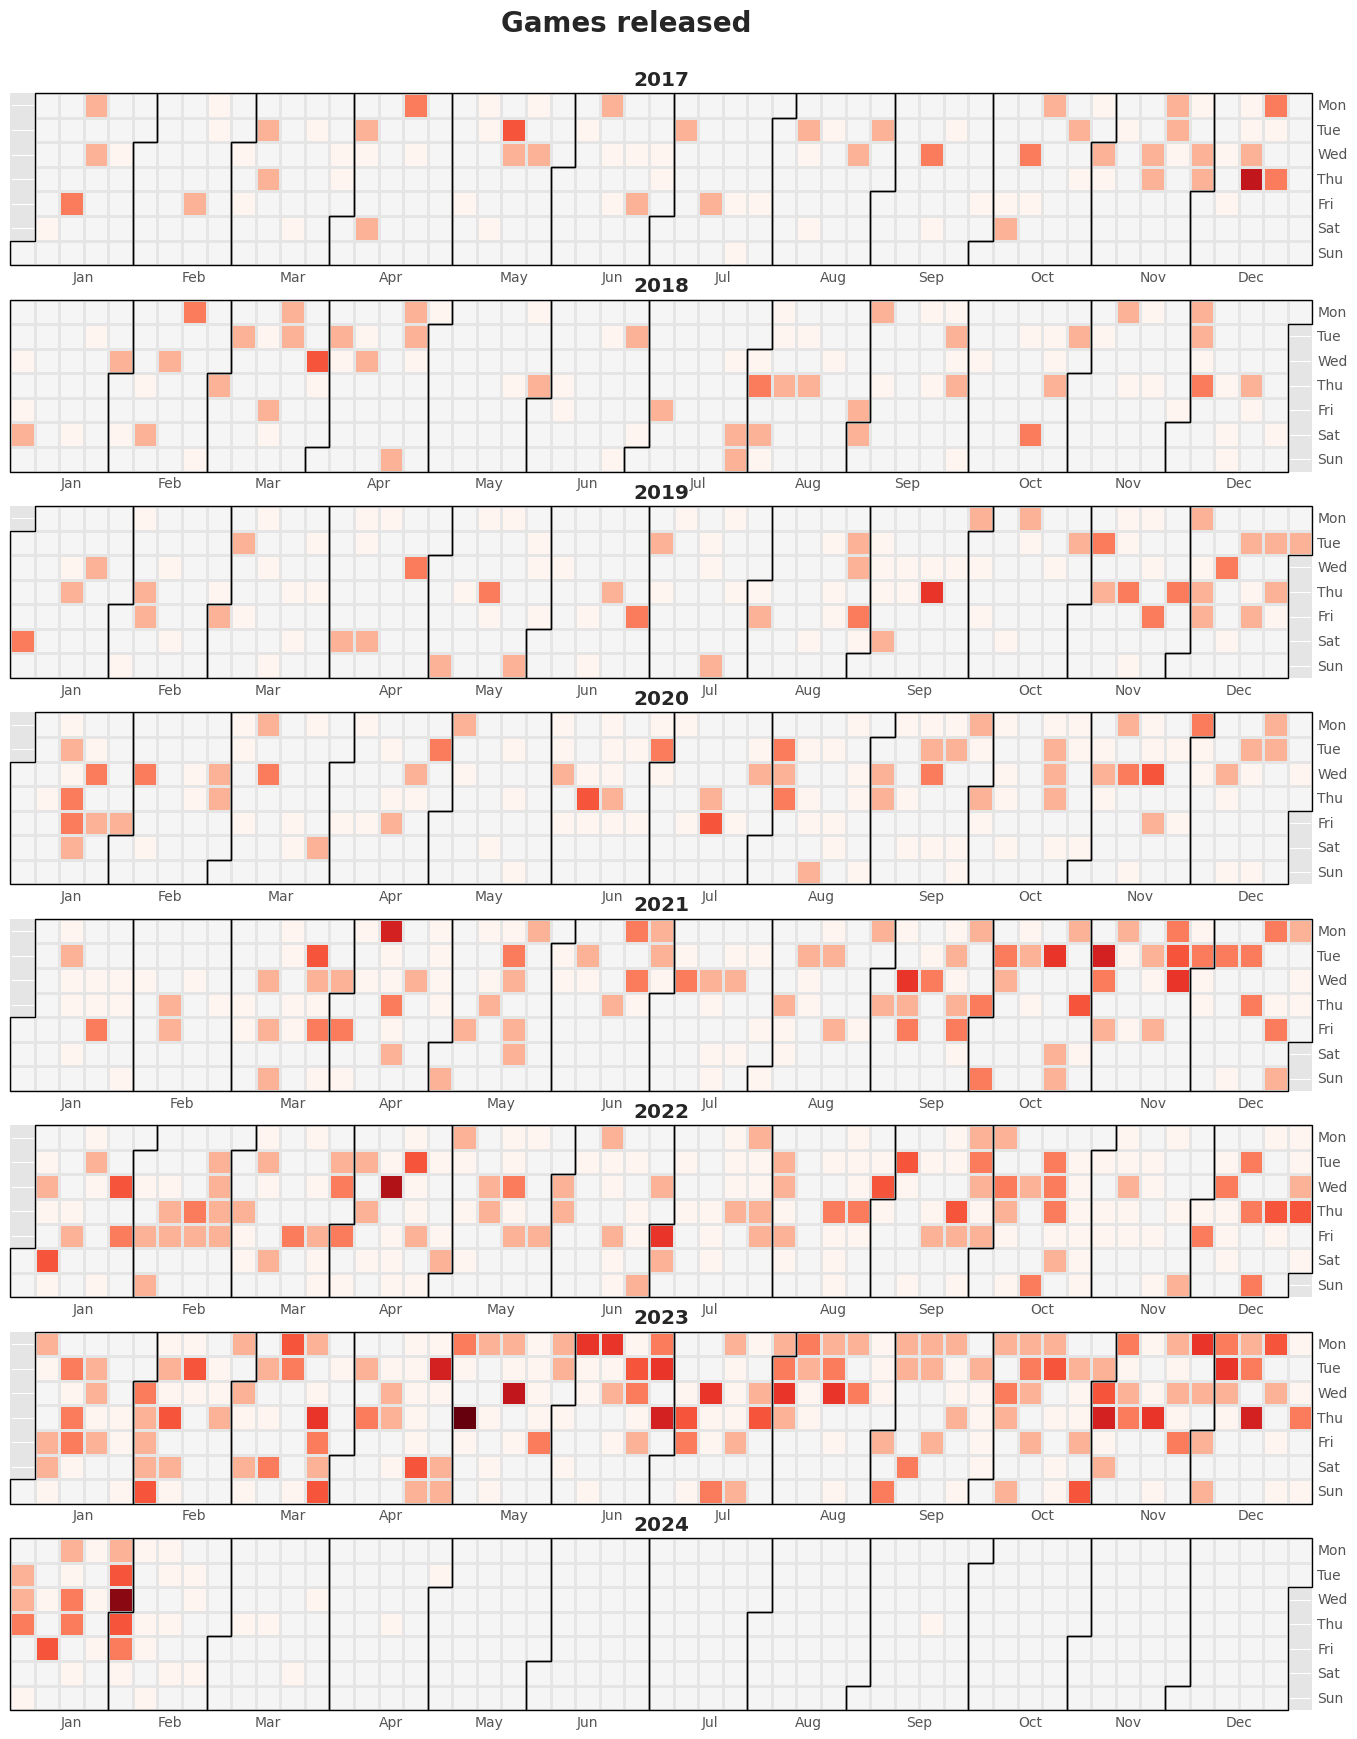

In [83]:
import calmap
events = sorted_df.groupby('releasedate')['games'].count()
fig,axs = plt.subplots(8,1,figsize = (28,21))
for i, year in enumerate([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]):
  calmap.yearplot(events.apply(np.log), year = year, cmap = 'Reds', monthly_border = True, ax=axs[i])
  axs[i].set_title(year, fontweight = 'bold')
fig.patch.set_facecolor("white")
fig.suptitle("Games released", y=0.92, fontsize=20, fontweight = 'bold')

### Game Player With Per Years

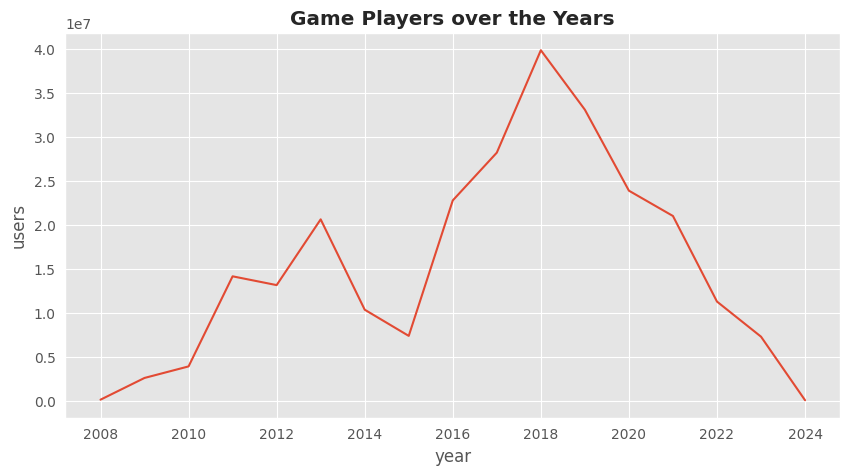

In [84]:
user_per_year = df.groupby('year')['users'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data = user_per_year, x = 'year', y = 'users' )
plt.title('Game Players over the Years', fontweight = 'bold')
plt.show()

### Most played games in 2018

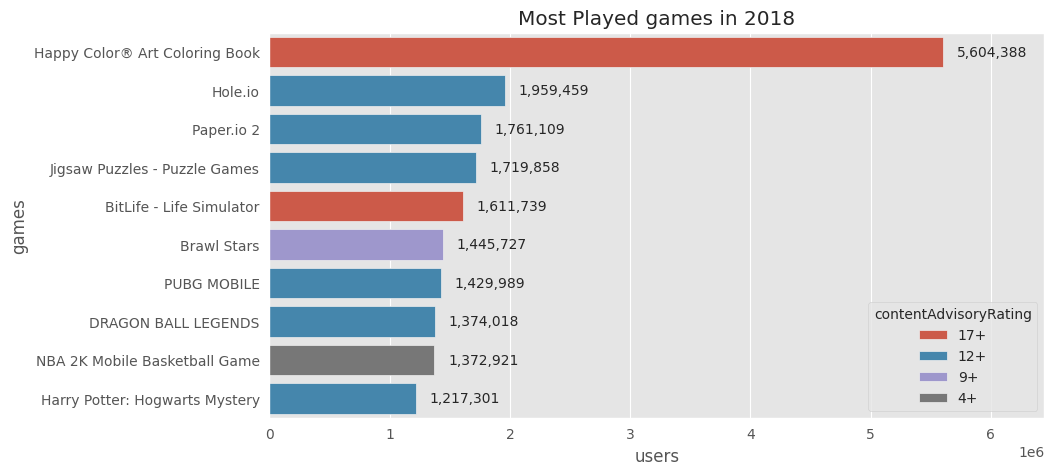

In [85]:
df2018 = df[df['year']==2018]
g2018df = df2018.groupby(['games','contentAdvisoryRating'])['users'].sum().reset_index().sort_values(by = 'users', ascending = False).head(10)

# Create the barplot
plt.figure(figsize=(10,5))
barplot = sns.barplot(data = g2018df, y = 'games', x = 'users', hue = 'contentAdvisoryRating')

# Add the values on top of each bar
for i, user in enumerate(g2018df['users']):
    barplot.text(user + 0.02 * g2018df['users'].max(), i, f'{user:,.0f}', va = 'center')  # Added a gap of 2% of the maximum user count

# Adjust x-axis limits
barplot.set_xlim(0, g2018df['users'].max() * 1.15)  # Increased the padding to 15% to accommodate the gap

plt.title('Most Played games in 2018')
plt.show()


### Most played Games in Recent Year

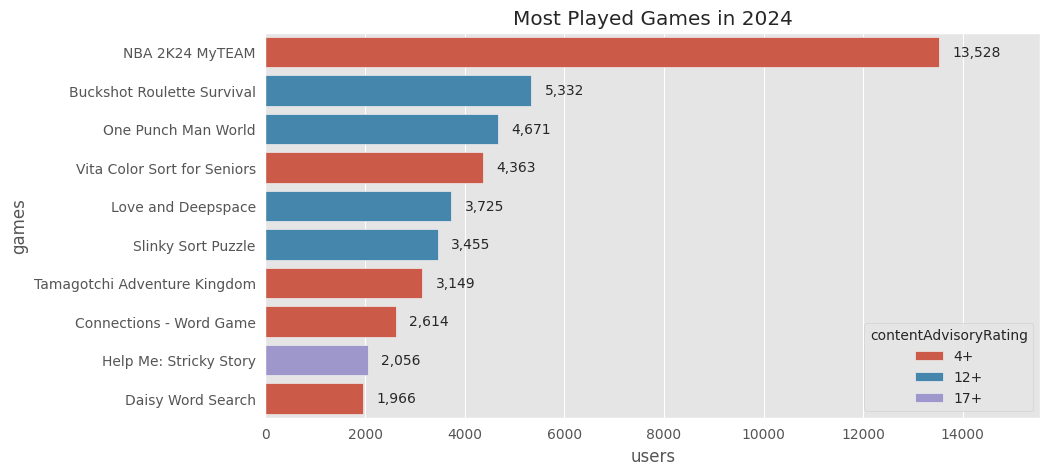

In [86]:
df2024 = df[df['year']==2024]
plot2024df = df2024.groupby(['games','contentAdvisoryRating'])['users'].sum().reset_index().sort_values(by = 'users', ascending = False).head(10)
plt.figure(figsize=(10,5))

plot2024 = sns.barplot(data = plot2024df, y = 'games', x = 'users', hue = 'contentAdvisoryRating')

for i, user in enumerate(plot2024df['users']):
  plot2024.text(user + 0.02 * plot2024df['users'].max(), i, f'{user:,.0f}', va = 'center')

plot2024.set_xlim(0,plot2024df['users'].max()*1.15)
plt.title('Most Played Games in 2024')
plt.show()

### Coorelation between games size and users

In [87]:
df['filesizeclass'] = None
df.loc[(df['filesizemb']>0) & (df['filesizemb']<=100), 'filesizeclass'] = '0-100MB'
df.loc[(df['filesizemb']>100) & (df['filesizemb']<=500), 'filesizeclass'] = '100-500MB'
df.loc[(df['filesizemb']>500) & (df['filesizemb']<=1500), 'filesizeclass'] = '500-1500MB'
df.loc[(df['filesizemb']>1500) & (df['filesizemb']<=2500), 'filesizeclass'] = '1500-2500MB'
df.loc[(df['filesizemb']>2500) & (df['filesizemb']<=3500), 'filesizeclass'] = '2500-3500MB'
df.loc[(df['filesizemb']>3500) & (df['filesizemb']<=4500), 'filesizeclass'] = '3500-4500MB'

In [91]:
sizeusers = pd.pivot_table(df, values='users', index='filesizeclass', columns='contentAdvisoryRating',
                           aggfunc='sum').sort_index(ascending = False).fillna(0)
sizeusers.style.background_gradient('Greens')

## Conclusion



*   Most Games produced by **SuperSonic Studios**.
*   **Myotana Limited** is the best studio based on Average user Ratings
*   **Chef & Friends: Cooking Game** is the Most highest Rated game.
*   **Minecraft** (Paid Game) is the most playe paid games.
*   **Year (2018)** have highest game players and **Year (2024)** have lowest game players.
*   In **Year 2023**, there is game production in higher number and in **Year (2018)** have the very less games production as compared to **Year 2023**. High game production in 2023, may be same storyline, copied from original games, unwanted ads, miscellanous charges, high end version requirements and many reason. that's prove, why recent years declinig users counts.
*   Most user want to play games those are in **100-500MB**. because it requrie less space and can run smoothly.
